<a href="https://colab.research.google.com/github/yanxingjianken/DURF/blob/main/YOLOv7_Ver0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def check_installed_libraries():
    libraries = ['cv2', 'numpy', 'pydrive', 'tensorflow']

    for library in libraries:
        try:
            exec(f"import {library}")
            print(f"{library} has been installed.")
        except ImportError:
            print(f"{library} has not been installed.")

check_installed_libraries()


cv2 has been installed.
numpy has been installed.
pydrive has been installed.
tensorflow has been installed.


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving client_secret_1024937029988-qom8cb34j0o9q3sqmlpt3g8p1i7g80ik.apps.googleusercontent.com.json to client_secret_1024937029988-qom8cb34j0o9q3sqmlpt3g8p1i7g80ik.apps.googleusercontent.com.json
User uploaded file "client_secret_1024937029988-qom8cb34j0o9q3sqmlpt3g8p1i7g80ik.apps.googleusercontent.com.json" with length 401 bytes


Processing client_secret_1024937029988-qom8cb34j0o9q3sqmlpt3g8p1i7g80ik.apps.googleusercontent.com.json: 0it [00:00, ?it/s]
Processing CHART - Live Cameras 2023-06-17 05_00.mp4:   0%|          | 38/467630 [00:00<21:14, 366.95it/s]

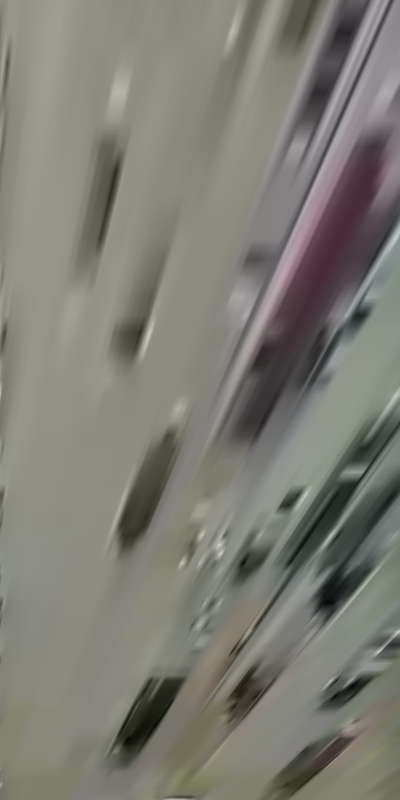

Processing CHART - Live Cameras 2023-06-17 05_00.mp4: 100%|██████████| 467630/467630 [22:47<00:00, 342.03it/s]
Processing CHART - Live Cameras 2023-06-15 13_11.mp4:   0%|          | 43/31042 [00:00<01:19, 389.80it/s]

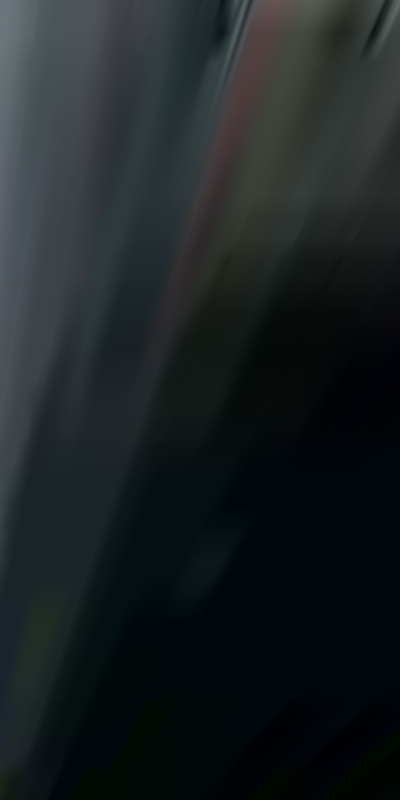

Processing CHART - Live Cameras 2023-06-15 13_11.mp4: 100%|██████████| 31042/31042 [01:30<00:00, 341.93it/s]
Processing CHART - Live Cameras 2023-04-15 15_59.mp4:   0%|          | 47/221857 [00:00<07:52, 469.21it/s]

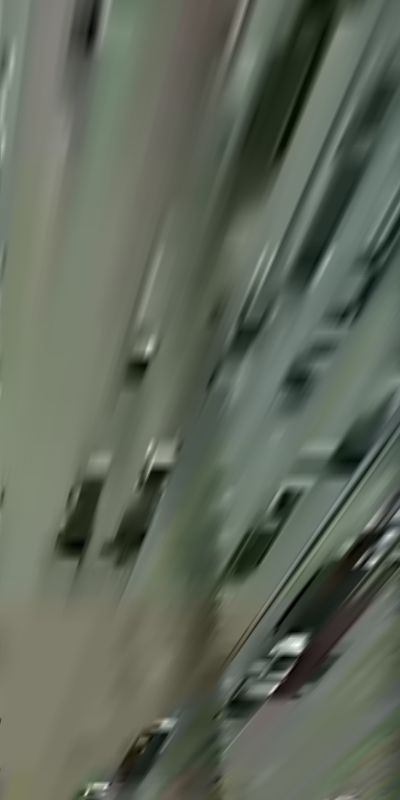

Processing CHART - Live Cameras 2023-04-15 15_59.mp4: 100%|██████████| 221857/221857 [11:04<00:00, 333.97it/s]
Processing CHART - Live Cameras 2023-04-14 14_48.mp4:   0%|          | 56/115238 [00:00<09:05, 211.15it/s]

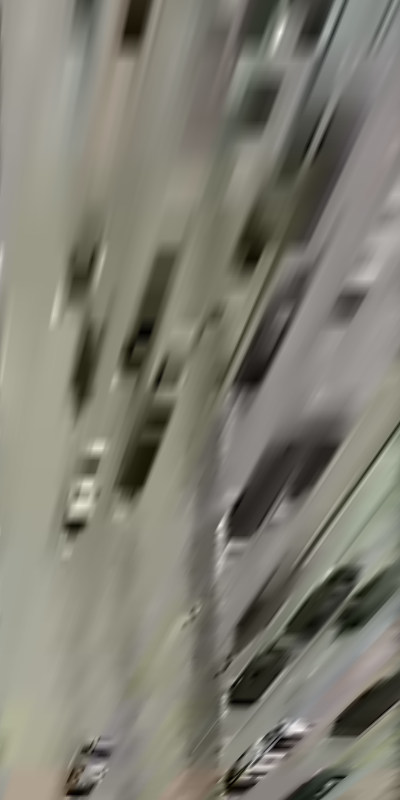

Processing CHART - Live Cameras 2023-04-14 14_48.mp4: 100%|██████████| 115238/115238 [05:46<00:00, 332.25it/s]
Processing CHART - Live Cameras 2023-04-12 17_50.mp4:   0%|          | 106/40293 [00:00<01:57, 340.74it/s]

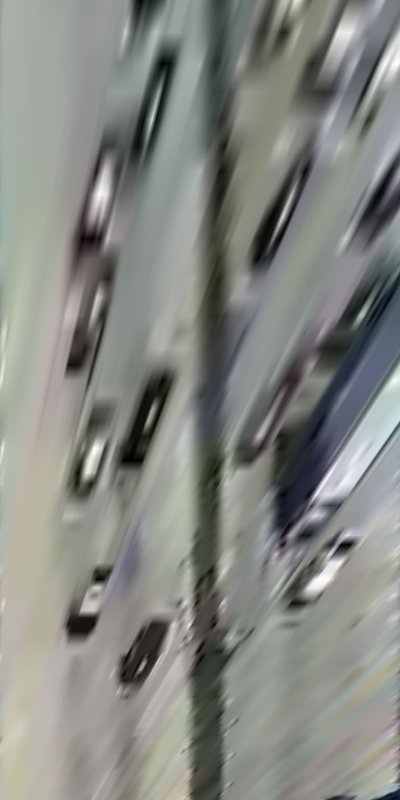

Processing CHART - Live Cameras 2023-04-12 17_50.mp4: 100%|██████████| 40293/40293 [02:04<00:00, 324.67it/s]
Processing CHART - Live Cameras 2023-04-10 17_41.mp4:   0%|          | 40/16346 [00:00<00:46, 350.15it/s]

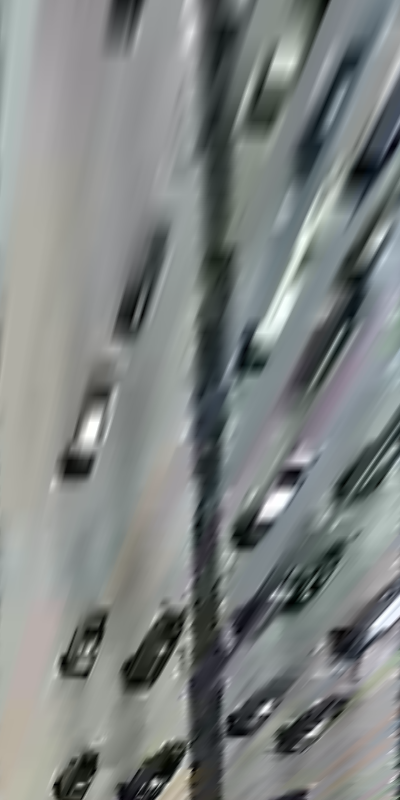

Processing CHART - Live Cameras 2023-04-10 17_41.mp4: 100%|██████████| 16346/16346 [00:50<00:00, 321.30it/s]
Processing CHART - Live Cameras 2023-04-10 16_51.mp4:   0%|          | 28/84878 [00:00<05:06, 277.02it/s]

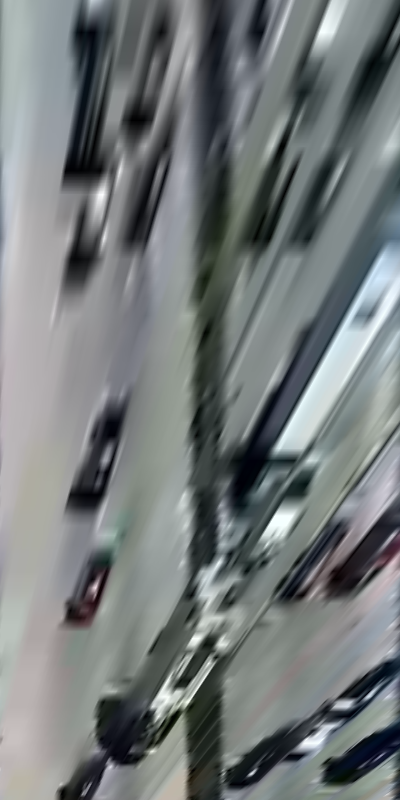

Processing CHART - Live Cameras 2023-04-10 16_51.mp4: 100%|██████████| 84878/84878 [04:28<00:00, 316.04it/s]
Processing CHART - Live Cameras 2023-03-28 18_11.mp4:   0%|          | 26/120838 [00:00<07:54, 254.81it/s]

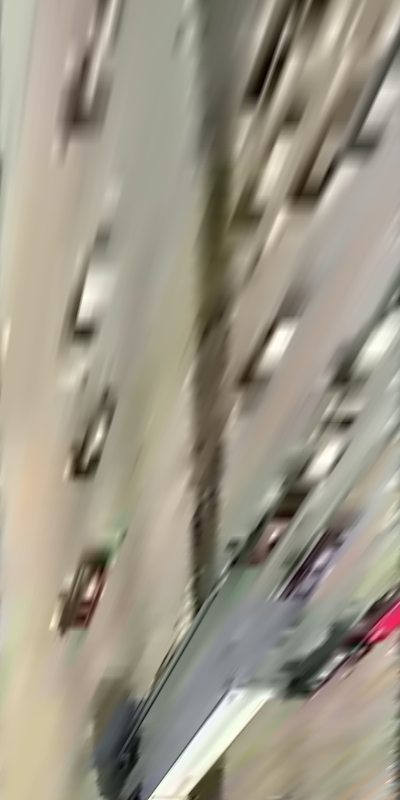

Processing CHART - Live Cameras 2023-03-28 18_11.mp4: 100%|██████████| 120838/120838 [06:24<00:00, 314.03it/s]
Processing CHART - Live Cameras 2023-03-26 16_45.mp4:   0%|          | 64/820545 [00:00<53:37, 254.99it/s]

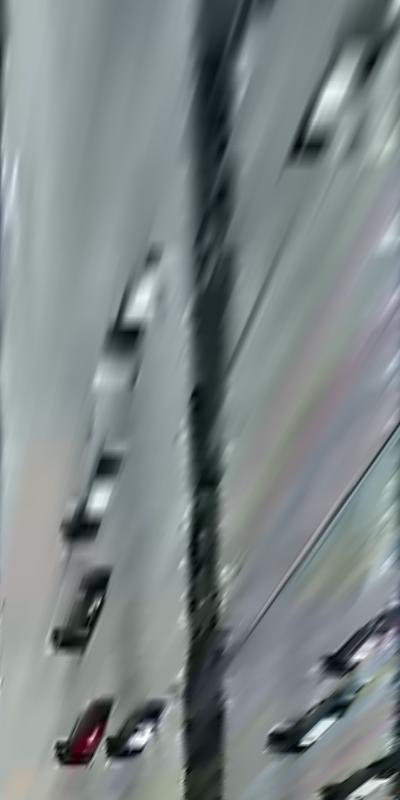

Processing CHART - Live Cameras 2023-03-26 16_45.mp4:  61%|██████    | 500027/820545 [27:07<16:41, 320.16it/s]

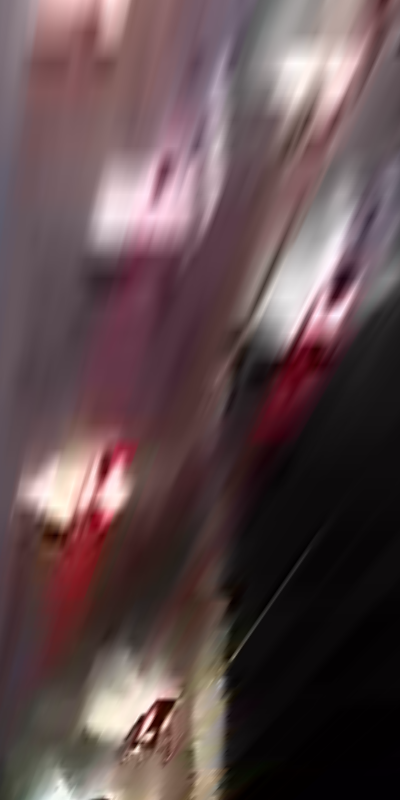

Processing CHART - Live Cameras 2023-03-26 16_45.mp4: 100%|██████████| 820545/820545 [44:15<00:00, 309.03it/s]
Processing CHART - Live Cameras 2023-03-03 22_05.mp4:   1%|          | 104/10933 [00:00<00:35, 301.54it/s]

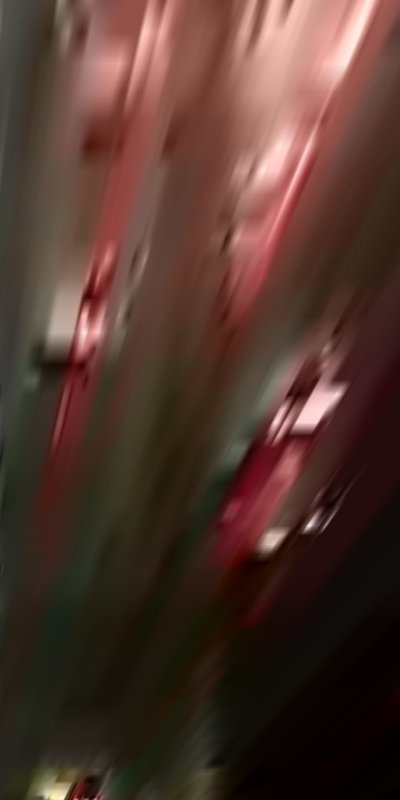

Processing CHART - Live Cameras 2023-03-03 22_05.mp4: 100%|██████████| 10933/10933 [00:35<00:00, 304.33it/s]


In [2]:
import os
import cv2
import numpy as np
import datetime
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab.patches import cv2_imshow
from oauth2client.client import GoogleCredentials
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

def process_frame(frame_count, frame, save_path):
    src = np.float32([[295, 154], [350, 233], [383, 154], [640, 233]])
    dst = np.float32([[0, 0], [0, 800], [400, 0], [400, 800]])  # Birds' eye: adjust these points

    matrix = cv2.getPerspectiveTransform(src, dst)
    bird_view = cv2.warpPerspective(frame, matrix, (400, 800))

    if frame_count % 500000 == 0:
        cv2_imshow(bird_view)
    if frame_count % 10 == 0:
        cv2.imwrite(os.path.join(save_path, f"frame_{frame_count}.jpg"), bird_view)

# 1. Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Specify the id of your Google Drive folder
folder_id = '1dR7AP323FjCp1ZiSSV068N1z_Yk9UTzX'

# Get the list of all files
file_list = drive.ListFile({'q': f"'{folder_id}' in parents"}).GetList()

# Specify the save path for processed frames
save_path = "/content/drive/MyDrive/DURF/processed_frames"

if not os.path.exists(save_path):
    os.makedirs(save_path)

# Create a thread pool
executor = ThreadPoolExecutor(max_workers=25)

# Loop through the files and download them
for file in file_list:
    # Download file
    file.GetContentFile(file['title'])

    # Open the video file
    cap = cv2.VideoCapture(file['title'])

    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for frame_count in tqdm(range(num_frames), desc=f"Processing {file['title']}"):
        ret, frame = cap.read()
        if ret:
            executor.submit(process_frame, frame_count, frame, save_path)

    # When everything done, release the video capture object
    cap.release()

    # Closes all the frames
    cv2.destroyAllWindows()

    # Remove the downloaded video file to save space
    os.remove(file['title'])

# Wait for all threads to finish
executor.shutdown(wait=True)


In [3]:
total_size = 0
for root, dirs, files in os.walk(save_path):
    for file in files:
        filepath = os.path.join(root, file)
        total_size += os.path.getsize(filepath)
print(f"Total size of saved images: {total_size / 1024 / 1024:.2f} MB")

Total size of saved images: 4122.07 MB


In [4]:
save_path

'/content/drive/MyDrive/DURF/processed_frames'

In [1]:
! pip install segment-anything

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import torch
from segment_anything import get_model, get_transform

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = get_model()
model.to(device).eval()

transform = get_transform()

def calculate_density(image):
    # Apply the transformations needed
    input_tensor = transform(image).unsqueeze(0)

    # Transfer to GPU (if available)
    input_tensor = input_tensor.to(device)

    # Predict the segmentation
    with torch.no_grad():
        output = model(input_tensor)['out'][0]

    # The output is a 2D image where each pixel is classified to a class
    output_predictions = output.argmax(0).cpu().numpy()

    # Count the number of road pixels
    road_pixels = (output_predictions == 0).sum()  # 0 is usually the label for road

    # Count the number of covered road pixels
    covered_pixels = (output_predictions != 0).sum()

    # Calculate the density
    density = covered_pixels / road_pixels

    return density



ModuleNotFoundError: ignored

In [ ]:
densities = []
for frame_count in tqdm(range(num_frames), desc=f"Processing {file['title']}"):
    ret, frame = cap.read()
    if ret:
        density = calculate_density(frame)
        densities.append(density)
        executor.submit(process_frame, frame_count, frame, save_path)
np.save('densities.npy', np.array(densities))


In [ ]:
import cv2
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import os
import datetime

# Load the trained model
net = cv2.dnn.readNet('yolov7.weights', 'yolov7.cfg')

# Connect to Google Drive
gauth = GoogleAuth()
drive = GoogleDrive(gauth)

# The folder id in Google Drive
folder_id = 'folder_id'  # Replace with your folder id

# Get the list of all files in directory
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()

# Prepare a function to process each video file
def process_video(video_file):
    cap = cv2.VideoCapture(video_file)
    ret, frame1 = cap.read()
    prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    speeds_and_densities = []

    while cap.isOpened():
        ret, frame2 = cap.read()
        if not ret:
            break

        # Speed
        next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        speed = np.mean(mag)

        # Density
        blob = cv2.dnn.blobFromImage(frame2, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward()
        car_area = sum([out[2]*out[3] for out in outs if out[1] == 'car'])
        density = car_area / (frame_width * frame_height)

        # Append to results
        speeds_and_densities.append((speed, density, cap.get(cv2.CAP_PROP_POS_MSEC)))

        prvs = next

    cap.release()

    # Convert to numpy array and save
    speeds_and_densities = np.array(speeds_and_densities)
    np.save(f'{os.path.splitext(video_file)[0]}.npy', speeds_and_densities)

# Process each video
for file in file_list:
    # Download file
    file.GetContentFile(file['title'])

    # Process the video
    process_video(file['title'])
